In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
plt.style.use('ggplot')  #a popular plot style in R

# Data loading

In [71]:
#url="https://github.com/Jennifer-ning/Practices-DS-takehome-Ning/blob/main/1.conversion_rate/conversion_data.csv"
#data=pd.read_csv(url, sep=',',
#                  lineterminator='\r',
#                  error_bad_lines=False)
data=pd.read_csv('/Users/ningzhang/Study/DataScience_takehome/Practices-DS-takehome-Ning/1.conversion_rate/conversion_data.csv')
data.head(10)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


In [72]:
# The information contains the number of columns, column labels, column data types, 
# memory usage, range index, and the number of cells in each column (non-null values).
data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [73]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [74]:
#understand the value of each column
for col in data.columns:
    uniques=sorted(data[col].unique())
    print('{0:20s} {1:5d}\t'.format(col, len(uniques)), uniques[:5])
    #print(col, ' ', len(uniques), ' ', uniques[:5])

country                  4	 ['China', 'Germany', 'UK', 'US']
age                     60	 [17, 18, 19, 20, 21]
new_user                 2	 [0, 1]
source                   3	 ['Ads', 'Direct', 'Seo']
total_pages_visited     29	 [1, 2, 3, 4, 5]
converted                2	 [0, 1]


# Remove outliers

Typical age should be below 100. while max of age =123, let's check.

In [75]:
data[data['age']>=100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [76]:
data=data[data['age']<100]
data.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


# Exploratory Data Analysis

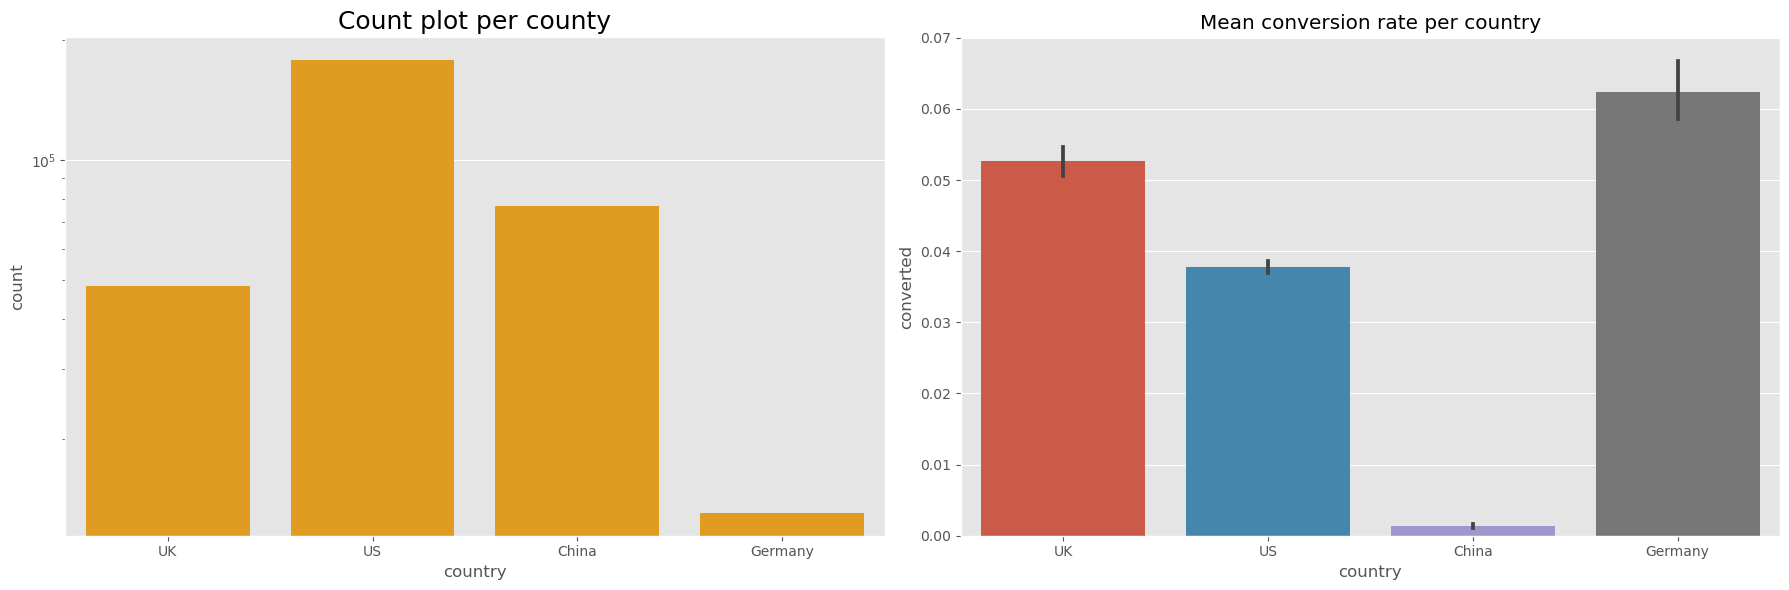

In [97]:
# visualization of country data
cols=data.columns
groups=data[[cols[0], cols[-1]]].groupby([cols[0]]).mean().reset_index()
groups.head()
fig,ax=plt.subplots(nrows=1,ncols=2, figsize=(18,6))
#sns.countplot(x=cols[0], hue=cols[-1], data=data, ax=ax[0])  
#ax[0].set_title('Count plot of country', fontsize=18)
#ax[0].set_yscale('log')

sns.countplot(x=cols[0], data=data, color='orange', ax=ax[0])
ax[0].set_title('Count plot per county', fontsize=18)
#when to use 'log' scale: A logarithmic scale in which one axis has the value in a regular interval 
# and the other axis has values incrementing at the power of 10 is used to plot larger values in mathematics.
ax[0].set_yscale('log')


sns.barplot(x=cols[0], y=cols[-1], data=data, ax=ax[1])
ax[1].set_title('Mean conversion rate per country')
plt.tight_layout()
plt.show()

Findings from above figures.
- There are many users from China but the conversion rate is very low.
- There are few users from Germany but the conversion rate is the highest.

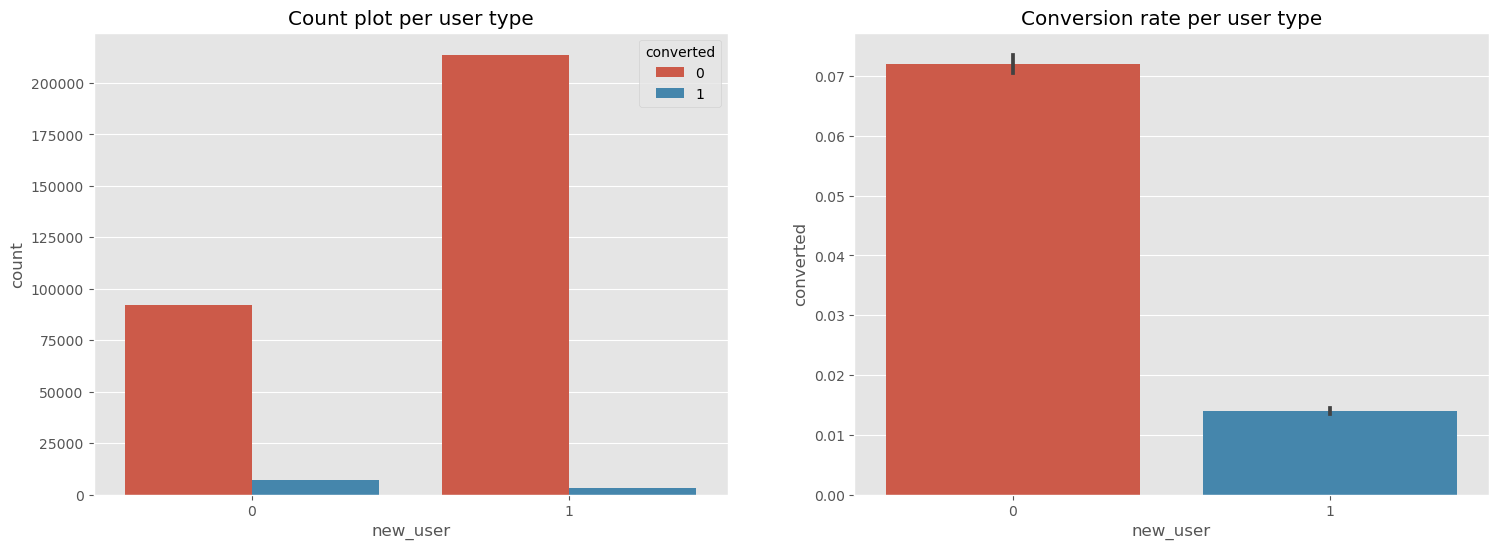

In [109]:
# visualization of user type data
grouped=data[[cols[2], cols[-1]]].groupby(cols[2]).mean().reset_index()
grouped

fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(x=cols[2], hue=cols[-1], data=data, ax=ax[0]) # hue can split bar into 2 bars based on the coversion column value 0,1
ax[0].set_title('Count plot per user type')

sns.barplot(x=cols[2], y=cols[-1], data=data, ax=ax[-1])
ax[1].set_title('Conversion rate per user type')
plt.tight_layout
plt.show()

Findings from above figures
- The number of new users is much larger than old users. While, the old users have a higher conversion rate.

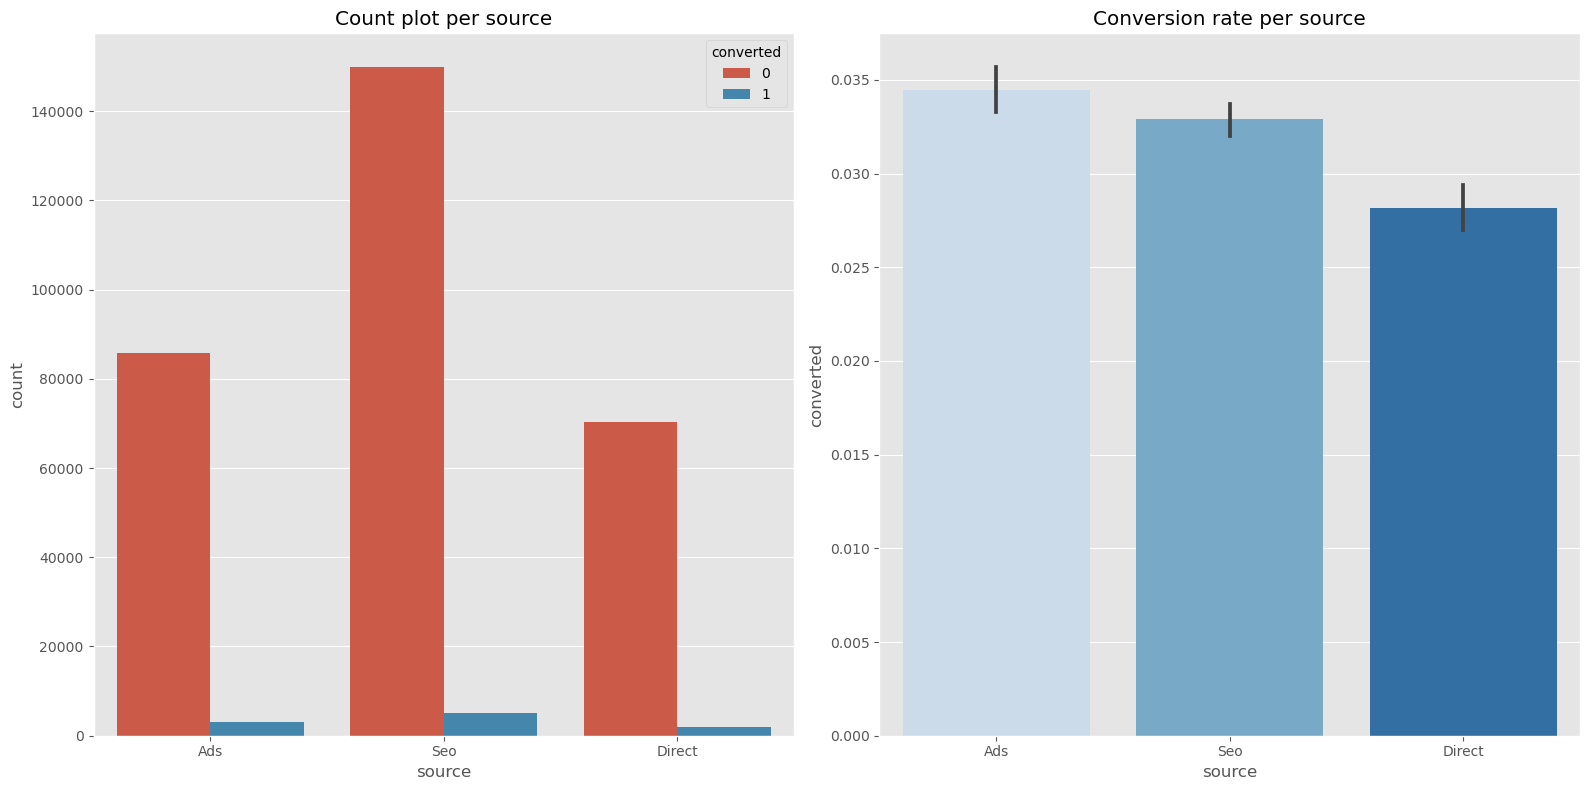

In [172]:
# visualization of sources data
grouped=data[[cols[3], cols[-1]]].groupby(cols[3]).mean().reset_index()
grouped
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(16,8))
sns.countplot(x=cols[3], hue=cols[-1], data=data, ax=ax[0])
ax[0].set_title('Count plot per source')

sns.barplot(x=cols[3], y=cols[-1], data=data, palette='Blues', ax=ax[1])
ax[1].set_title('Conversion rate per source')
plt.tight_layout()
plt.show()

Finding from above figures
- Though the seo source has the most instances, the conversion rate for all the three source types is not obviously different.

/var/folders/_g/1x3fm8xd1xd2bj18tbx2zb4r0000gn/T/ipykernel_5093/3431829292.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['converted'] == 0]['age'], label='Converted 0',
/var/folders/_g/1x3fm8xd1xd2bj18tbx2zb4r0000gn/T/ipykernel_5093/3431829292.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


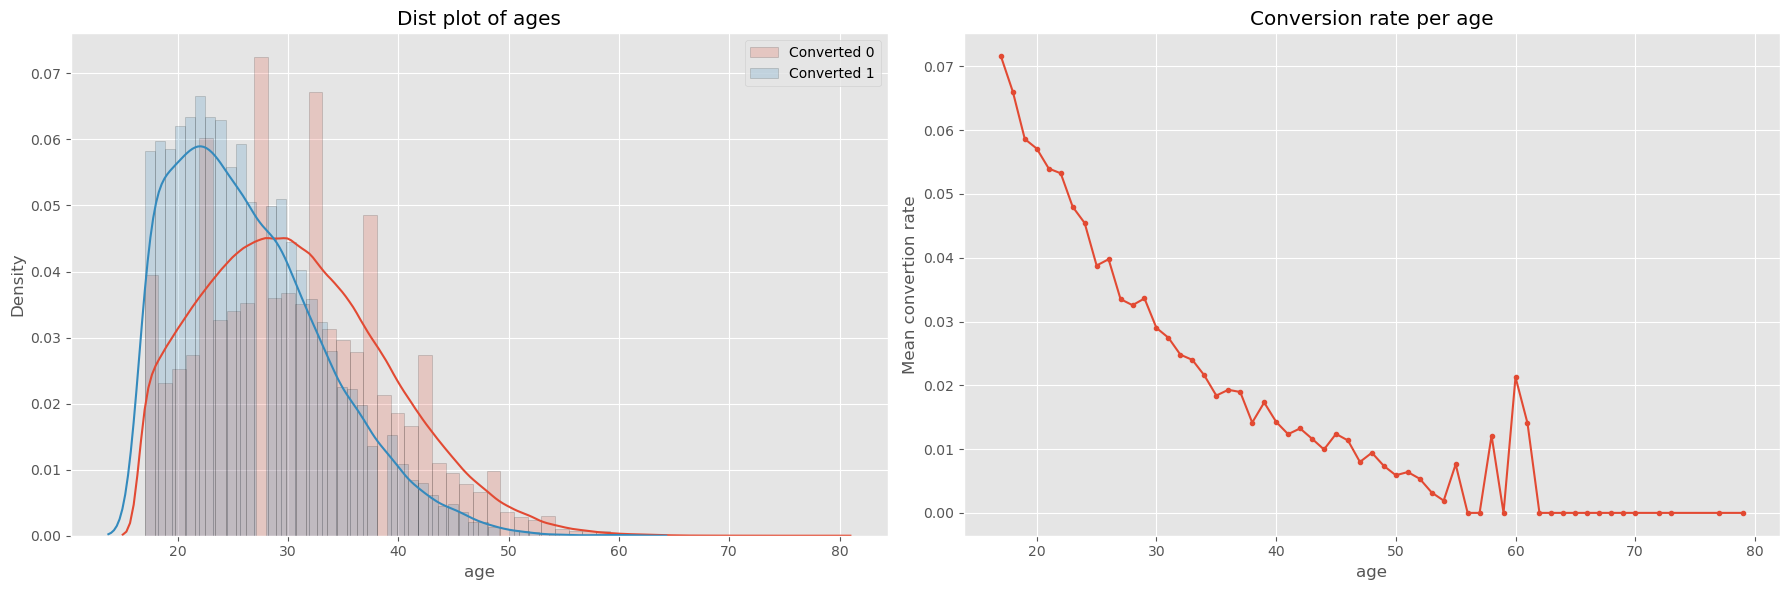

In [194]:
# Visualization of ages
grouped = data[['age', 'converted']].groupby('age').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(data[data['converted'] == 0]['age'], label='Converted 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['age'], label='Converted 1', 
             ax=ax[0], hist_kws=hist_kws)
#sns.displot(data=data[data['converted'] == 0], x=cols[1], stat="density",  kde=True, ax=ax[0])
#sns.displot(data=data[data['converted'] == 1], x=cols[1], stat="density",  kde=True, ax=ax[0])
ax[0].set_title('Dist plot of ages')
ax[0].legend()
ax[1].plot(grouped['age'], grouped['converted'], '.-')
ax[1].set_title('Conversion rate per age')
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
plt.tight_layout()
plt.show()

Findings from above figures
- Most users are younger than 50. 
- Generally, the conversion rate decreases with the increase of age.

/var/folders/_g/1x3fm8xd1xd2bj18tbx2zb4r0000gn/T/ipykernel_5093/492585180.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data[cols[-1]]==0][cols[4]], label='Conversion=0', hist_kws=hist_kws, ax=ax[0])
/var/folders/_g/1x3fm8xd1xd2bj18tbx2zb4r0000gn/T/ipykernel_5093/492585180.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

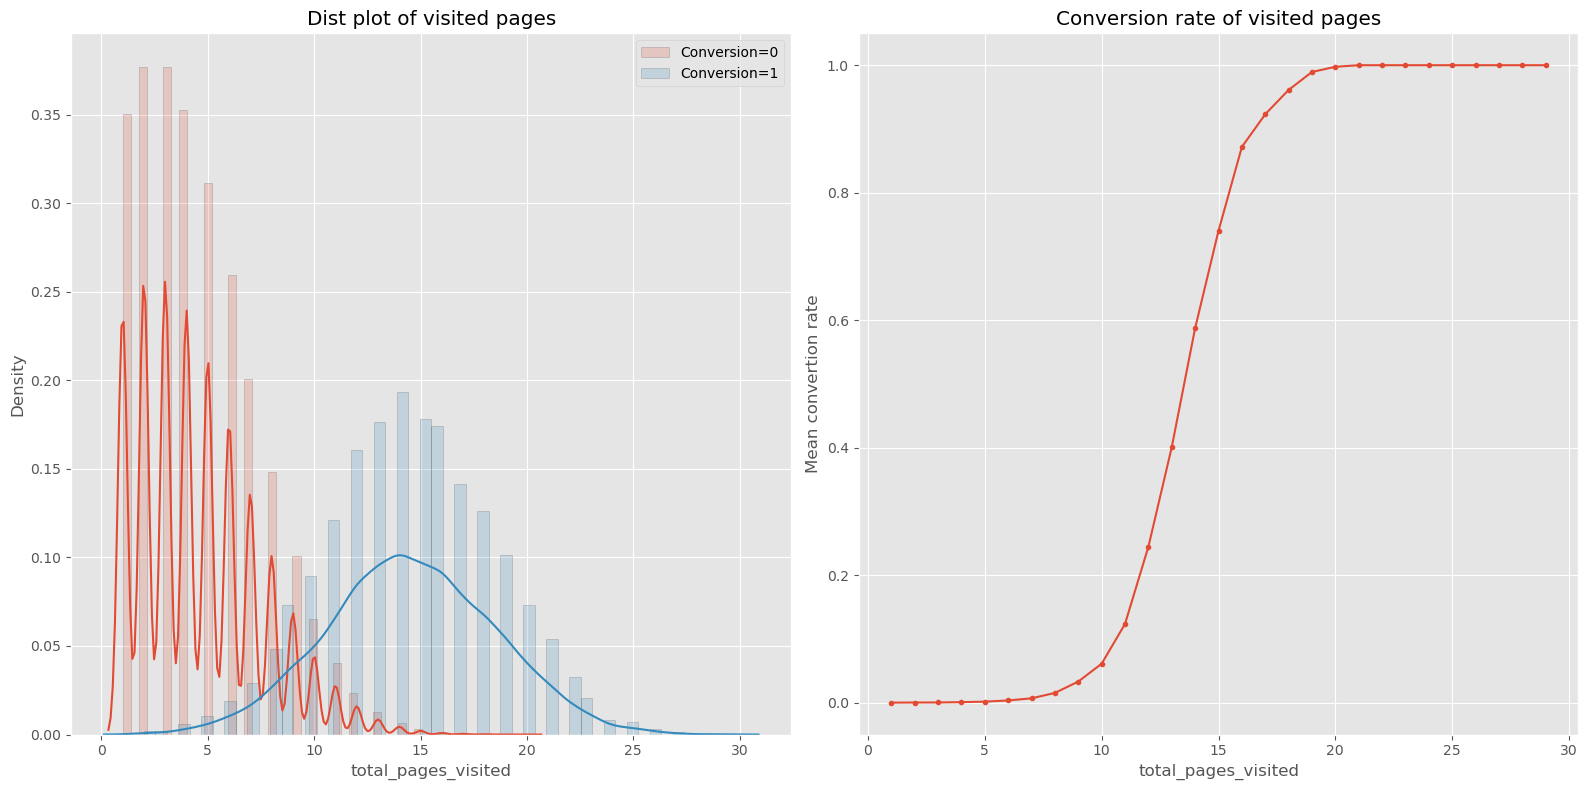

In [195]:
# Visualization of visited pages
grouped=data[[cols[4], cols[-1]]].groupby(cols[4]).mean().reset_index()
grouped

fig,ax=plt.subplots(nrows=1,ncols=2, figsize=(16,8))
sns.distplot(data[data[cols[-1]]==0][cols[4]], label='Conversion=0', hist_kws=hist_kws, ax=ax[0])
sns.distplot(data[data[cols[-1]]==1][cols[4]], label='Conversion=1', hist_kws=hist_kws, ax=ax[0])
ax[0].legend()
ax[0].set_title('Dist plot of visited pages')
ax[1].plot(grouped[cols[4]], grouped[cols[-1]], '.-')
ax[1].set_title('Conversion rate of visited pages')
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
fig.tight_layout()
fig.show()

Findings from above figures
- Visiting more pape brings a positive conversion effect.
- With the increase of visited page number, the conversion rate has an increase, particularly for the pages around 15.